# Machine Learning-Based Analysis of Gene Expression Profiles in Breast Cancer


**Original Educational Template**(Provided by course instructors)      
**Mohamed Hussein** (Code restructuring, enhanced clarity, detailed annotations, and GitHub publication)    
**Date:** 2025-09-23


## Notebook 4 – Model Building & Evaluation

This notebook focuses on training and evaluating machine learning models using the top 50 genes selected in Notebook 3.
The goal: train Random Forest and SVM classifiers on selected features, evaluate performance (confusion matrix, classification report, accuracy), visualize confusion matrices, and extract top marker genes using Random Forest feature importances.


## Workflow Overview:

1. Import required libraries
2. Load feature-selected datasets (train/test sets and labels)
3. Train Random Forest and SVM classifiers
4. Evaluate model performance (accuracy, confusion matrix, classification report)
5. Visualize confusion matrices
6. Identify top 20 marker genes from Random Forest
7. Export evaluation plots and gene importance results

# 4.0 Import Required Libraries

In [6]:
import pandas as pd                                      # Data manipulation and analysis
import numpy as np                                       # Numerical operations
import matplotlib.pyplot as plt                          # Data visualization
import seaborn as sns                                    # Statistical data visualization
from sklearn.ensemble import RandomForestClassifier      # Random Forest model
from sklearn.svm import SVC                              # Support Vector Machine model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Evaluation metrics
import pickle                                            # Save and load serialized Python objects



# 4.1 Load Feature-Selected Train/Test Data

In [8]:
with open('X_train_selected.pkl', 'rb') as f: X_train_selected = pickle.load(f)  # Load selected training features
with open('X_test_selected.pkl', 'rb') as f: X_test_selected = pickle.load(f)    # Load selected testing features
with open('y_train.pkl', 'rb') as f: y_train = pickle.load(f)                    # Load training labels
with open('y_test.pkl', 'rb') as f: y_test = pickle.load(f)                      # Load testing labels
with open('selected_gene_names.pkl', 'rb') as f: selected_gene_names = pickle.load(f)  # Load selected gene names

print("Training set shape:", X_train_selected.shape)         # Confirm training features shape
print("Test set shape:", X_test_selected.shape)              # Confirm test features shape
print("Number of selected genes:", len(selected_gene_names)) # Number of selected genes
print("Top 5 selected genes:", selected_gene_names[:5])      # Show first 5 gene names



Training set shape: (40, 50)
Test set shape: (18, 50)
Number of selected genes: 50
Top 5 selected genes: ['CD300LG', 'ANLN', 'CRTAP', 'MOCS1', 'PTCH1']


# 4.2 Train Machine Learning Models

In [10]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)  # Initialize Random Forest with 1000 trees
rf.fit(X_train_selected, y_train)                                 # Train Random Forest on selected features
y_rf_preds = rf.predict(X_test_selected)                          # Predict on test set using Random Forest

svm = SVC(kernel='linear', random_state=42)                       # Initialize linear-kernel SVM
svm.fit(X_train_selected, y_train)                                # Train SVM on selected features
y_svm_preds = svm.predict(X_test_selected)                        # Predict on test set using SVM


# 4.3 Evaluate Model Performance

In [12]:
print("\n=== Random Forest Evaluation ===")                        # Header for RF results
print(confusion_matrix(y_test, y_rf_preds))                       # Print RF confusion matrix
print(classification_report(y_test, y_rf_preds))                  # Print RF classification report
print("Accuracy:", accuracy_score(y_test, y_rf_preds))            # Print RF accuracy

print("\n=== SVM Evaluation ===")                                 # Header for SVM results
print(confusion_matrix(y_test, y_svm_preds))                      # Print SVM confusion matrix
print(classification_report(y_test, y_svm_preds))                 # Print SVM classification report
print("Accuracy:", accuracy_score(y_test, y_svm_preds))           # Print SVM accuracy




=== Random Forest Evaluation ===
[[9 1]
 [0 8]]
              precision    recall  f1-score   support

      Cancer       1.00      0.90      0.95        10
      Normal       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

Accuracy: 0.9444444444444444

=== SVM Evaluation ===
[[9 1]
 [0 8]]
              precision    recall  f1-score   support

      Cancer       1.00      0.90      0.95        10
      Normal       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

Accuracy: 0.9444444444444444


# 4.4 Visualize Confusion Matrices

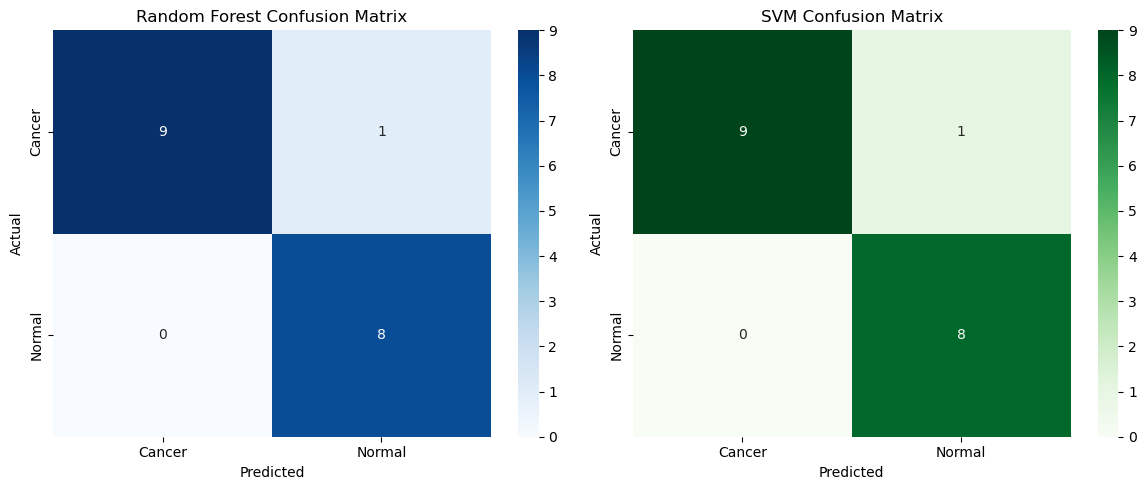

In [14]:
labels_unique = np.unique(y_train)                               # Unique class labels (for axis ticks)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))                   # Prepare subplot for two confusion matrices

cm_rf = confusion_matrix(y_test, y_rf_preds)                      # RF confusion matrix array
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',             # Plot RF confusion matrix
            xticklabels=labels_unique, yticklabels=labels_unique, ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')               # Title for RF subplot
axes[0].set_xlabel('Predicted')                                   # X label for RF
axes[0].set_ylabel('Actual')                                      # Y label for RF

cm_svm = confusion_matrix(y_test, y_svm_preds)                    # SVM confusion matrix array
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',           # Plot SVM confusion matrix
            xticklabels=labels_unique, yticklabels=labels_unique, ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')                         # Title for SVM subplot
axes[1].set_xlabel('Predicted')                                   # X label for SVM
axes[1].set_ylabel('Actual')                                      # Y label for SVM

plt.tight_layout()                                                # Adjust layout
plt.savefig('confusion_matrices.png', dpi=300)                    # Save figure to file
plt.show()                                                        # Display figure



# 4.5 Identify Top 20 Marker Genes (Random Forest Feature Importance)

C:\Users\space\AppData\Local\Temp\ipykernel_1008\2120849330.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene', data=importance_df, palette='viridis')


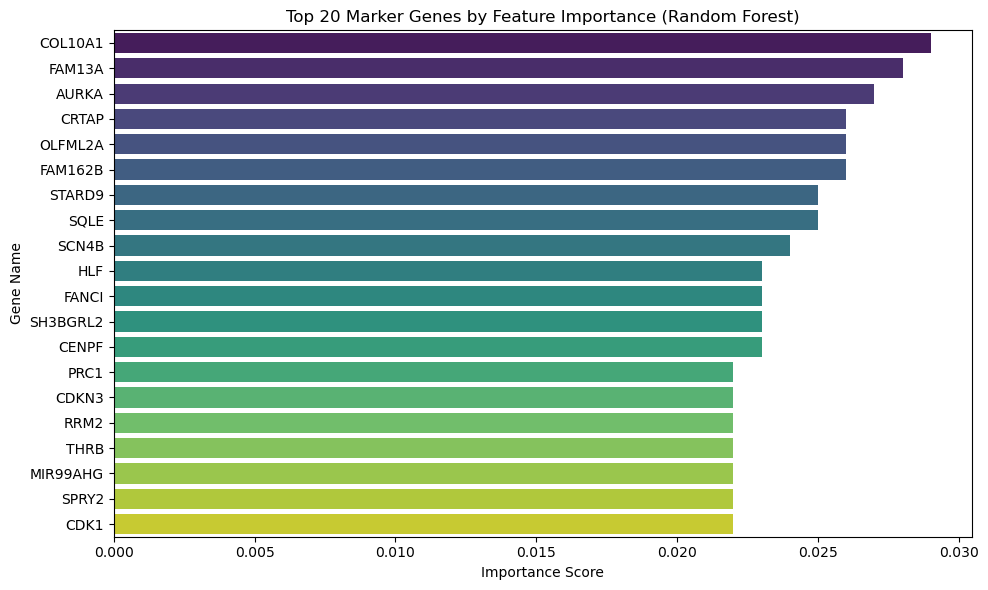

In [16]:
importances = rf.feature_importances_                             # Extract feature importance scores from RF
indices = np.argsort(importances)[::-1][:20]                      # Indices of top 20 features by importance

top_genes = [selected_gene_names[i] for i in indices]             # Get gene names for top features
top_importances = importances[indices]                            # Corresponding importance values

importance_df = pd.DataFrame({                                    # Create dataframe for top genes and scores
    'Gene': top_genes,
    'Importance': top_importances
})

importance_df.to_csv('top_20_marker_genes.csv', index=False)       # Save top 20 marker genes CSV

plt.figure(figsize=(10, 6))                                       # Plotting top 20 feature importances
sns.barplot(x='Importance', y='Gene', data=importance_df, palette='viridis')
plt.title('Top 20 Marker Genes by Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Gene Name')
plt.tight_layout()
plt.savefig('top_20_marker_genes.png', dpi=300)                   # Save importance plot
plt.show()                                                        # Display plot


# 4.6 Completion Summary

In [18]:
print("\n Model training and evaluation completed successfully!")  # Final confirmation
print("Saved files:")                                                # List saved output files
print("- confusion_matrices.png")
print("- top_20_marker_genes.csv")
print("- top_20_marker_genes.png")



 Model training and evaluation completed successfully!
Saved files:
- confusion_matrices.png
- top_20_marker_genes.csv
- top_20_marker_genes.png


**Next Step:** Notebook 5 will focus on **CrossValidation and Hyperparameter Tuning**.

### Export Notebook 4 to HTML

In [21]:
!jupyter nbconvert --to html --embed-images "Notebook_4_Model_Building_Evaluation.ipynb" --output "Notebook_4_Model_Building_Evaluation.html"


[NbConvertApp] Converting notebook Notebook_4_Model_Building_Evaluation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 395834 bytes to Notebook_4_Model_Building_Evaluation.html
